# Run model module GCP

In [24]:
%%writefile config.yaml
trainingInput:
  scaleTier: CUSTOM
  masterType: n1-highcpu-16
  workerType: cloud_tpu
  workerCount: 1
  workerConfig:
    acceleratorConfig:
      type: TPU_V3
      count: 8

Overwriting config.yaml


In [27]:
import math
import os

def convert_conv_layer_property_lists_to_string(property_list, prop_list_len):
    """Convert conv layer property list to string.

    Args:
        property_list: list, nested list of blocks of a conv layer property.
        prop_list_len: int, length of list to process.

    Returns:
        Doubly delimited string of conv layer property values.
    """
    return (";").join(
        [
            (",").join([str(val) for val in block])
            for block in property_list[0:prop_list_len]
        ]
    )
    

# Import os environment variables for file hyperparameters.
os.environ["TRAIN_FILE_PATTERN"] = "gs://machine-learning-1234-bucket/gan/pg_anogan_sim_enc/data/cifar10_car/train*.tfrecord"
os.environ["EVAL_FILE_PATTERN"] = "gs://machine-learning-1234-bucket/gan/pg_anogan_sim_enc/data/cifar10_car/test*.tfrecord"
os.environ["OUTPUT_DIR"] = "gs://machine-learning-1234-bucket/gan/pg_anogan_sim_enc/trained_model_gcp_big"

# Import os environment variables for train hyperparameters.
os.environ["TRAIN_BATCH_SIZE"] = str(128)
os.environ["TRAIN_STEPS"] = str(112500)
os.environ["USE_TPU"] = "True"
os.environ["USE_ESTIMATOR_TRAIN_AND_EVALUATE"] = "False"
os.environ["SAVE_OPTIMIZER_METRICS_TO_CHECKPOINT"] = "True"
os.environ["SAVE_SUMMARY_STEPS"] = str(1)
os.environ["SAVE_CHECKPOINTS_STEPS"] = str(100)
os.environ["KEEP_CHECKPOINT_MAX"] = str(100)

# Import os environment variables for eval hyperparameters.
os.environ["EVAL_BATCH_SIZE"] = str(16)
os.environ["EVAL_STEPS"] = "None"
os.environ["START_DELAY_SECS"] = str(600)
os.environ["THROTTLE_SECS"] = str(600)
os.environ["EVAL_ON_TPU"] = "True"

# Import os environment variables for serving hyperparameters.
os.environ["EXPORTS_TO_KEEP"] = str(50)
os.environ["EXPORT_TO_TPU"] = "False"
os.environ["EXPORT_TO_CPU"] = "True"
os.environ["PREDICT_ALL_RESOLUTIONS"] = "True"
os.environ["PREDICT_G_Z"] = "True"
os.environ["ANOMALY_THRESHOLD"] = str(5.0)
os.environ["ANOM_CONVEX_COMBO_FACTOR"] = str(0.05)

# Import os environment variables for image hyperparameters.
os.environ["HEIGHT"] = str(32)
os.environ["WIDTH"] = str(32)
os.environ["DEPTH"] = str(3)

# Import os environment variables for shared hyperparameters.
os.environ["NUM_STEPS_UNTIL_GROWTH"] = str(6250)
os.environ["USE_EQUALIZED_LEARNING_RATE"] = "True"

# Full lists for full 1024x1024 network growth.
full_conv_num_filters = [[512, 512], [512, 512], [512, 512], [512, 512], [256, 256], [128, 128], [64, 64], [32, 32], [16, 16]]
full_conv_kernel_sizes = [[4, 3], [3, 3], [3, 3], [3, 3], [3, 3], [3, 3], [3, 3], [3, 3], [3, 3]]
full_conv_strides = [[1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]]

# Set final image size as a multiple of 2, starting at 4.
image_size = 32
os.environ["IMAGE_SIZE"] = str(image_size)
prop_list_len = max(
    min(int(math.log(image_size, 2) - 1), len(full_conv_num_filters)), 1
)

# Get slices of lists.
conv_num_filters = convert_conv_layer_property_lists_to_string(
    full_conv_num_filters, prop_list_len
)
print("conv_num_filters = {}".format(conv_num_filters))
conv_kernel_sizes = convert_conv_layer_property_lists_to_string(
    full_conv_kernel_sizes, prop_list_len
)
print("conv_kernel_sizes = {}".format(conv_kernel_sizes))
conv_strides = convert_conv_layer_property_lists_to_string(
    full_conv_strides, prop_list_len
)
print("conv_strides = {}".format(conv_strides))

os.environ["CONV_NUM_FILTERS"] = conv_num_filters
os.environ["CONV_KERNEL_SIZES"] = conv_kernel_sizes
os.environ["CONV_STRIDES"] = conv_strides

# Import os environment variables for generator hyperparameters.
os.environ["LATENT_SIZE"] = str(512)
os.environ["NORMALIZE_LATENT"] = "True"
os.environ["USE_PIXEL_NORM"] = "True"
os.environ["PIXEL_NORM_EPSILON"] = str(1e-8)
os.environ["GENERATOR_PROJECTION_DIMS"] = "4,4,512"
os.environ["GENERATOR_LEAKY_RELU_ALPHA"] = str(0.2)
os.environ["GENERATOR_TO_RGB_ACTIVATION"] = "None"
os.environ["GENERATOR_L1_REGULARIZATION_SCALE"] = str(0.)
os.environ["GENERATOR_L2_REGULARIZATION_SCALE"] = str(0.)
os.environ["GENERATOR_OPTIMIZER"] = "Adam"
os.environ["GENERATOR_LEARNING_RATE"] = str(0.001)
os.environ["GENERATOR_ADAM_BETA1"] = str(0.)
os.environ["GENERATOR_ADAM_BETA2"] = str(0.99)
os.environ["GENERATOR_ADAM_EPSILON"] = str(1e-8)
os.environ["GENERATOR_CLIP_GRADIENTS"] = "None"
os.environ["GENERATOR_TRAIN_STEPS"] = str(1)

# Import os environment variables for discriminator hyperparameters.
os.environ["USE_MINIBATCH_STDDEV"] = "True"
os.environ["MINIBATCH_STDDEV_GROUP_SIZE"] = str(4)
os.environ["MINIBATCH_STDDEV_AVERAGING"] = "True"
os.environ["DISCRIMINATOR_LEAKY_RELU_ALPHA"] = str(0.2)
os.environ["DISCRIMINATOR_L1_REGULARIZATION_SCALE"] = str(0.)
os.environ["DISCRIMINATOR_L2_REGULARIZATION_SCALE"] = str(0.)
os.environ["DISCRIMINATOR_OPTIMIZER"] = "Adam"
os.environ["DISCRIMINATOR_LEARNING_RATE"] = str(0.001)
os.environ["DISCRIMINATOR_ADAM_BETA1"] = str(0.)
os.environ["DISCRIMINATOR_ADAM_BETA2"] = str(0.99)
os.environ["DISCRIMINATOR_ADAM_EPSILON"] = str(1e-8)
os.environ["DISCRIMINATOR_CLIP_GRADIENTS"] = "None"
os.environ["DISCRIMINATOR_GRADIENT_PENALTY_COEFFICIENT"] = str(10.0)
os.environ["EPSILON_DRIFT"] = str(0.001)
os.environ["DISCRIMINATOR_TRAIN_STEPS"] = str(1)

# Import os environment variables for encoder hyperparameters.
os.environ["ENCODER_LEAKY_RELU_ALPHA"] = str(0.2)
os.environ["ENCODER_L1_REGULARIZATION_SCALE"] = str(0.)
os.environ["ENCODER_L2_REGULARIZATION_SCALE"] = str(0.)
os.environ["ENCODER_OPTIMIZER"] = "Adam"
os.environ["ENCODER_LEARNING_RATE"] = str(0.001)
os.environ["ENCODER_ADAM_BETA1"] = str(0.)
os.environ["ENCODER_ADAM_BETA2"] = str(0.99)
os.environ["ENCODER_ADAM_EPSILON"] = str(1e-8)
os.environ["ENCODER_CLIP_GRADIENTS"] = "None"


conv_num_filters = 512,512;512,512;512,512;512,512
conv_kernel_sizes = 4,3;3,3;3,3;3,3
conv_strides = 1,1;1,1;1,1;1,1


In [28]:
PROJECT = "machine-learning-1234"
BUCKET = "machine-learning-1234-bucket"
REGION = "us-central1"

# Import os environment variables
os.environ["PROJECT"] = PROJECT
os.environ["BUCKET"] =  BUCKET
os.environ["REGION"] = REGION
os.environ["TFVERSION"] = "1.15"
os.environ["PYTHON_VERSION"] = "3.5"

## Train pg_AnoGAN_Sim_Enc model

In [29]:
%%bash
JOBNAME=pg_anogan_sim_enc_${IMAGE_SIZE}x${IMAGE_SIZE}_$(date -u +%y%m%d_%H%M%S)
echo ${OUTPUT_DIR} ${REGION} ${JOBNAME}
gsutil -m rm -rf ${OUTPUT_DIR}
gcloud ai-platform jobs submit training ${JOBNAME} \
    --region=${REGION} \
    --module-name=trainer.task \
    --package-path=$PWD/pg_anogan_sim_enc_tpu_module/trainer \
    --job-dir=${OUTPUT_DIR} \
    --staging-bucket=gs://${BUCKET} \
    --config=config.yaml \
    --runtime-version=${TFVERSION} \
    --python-version=${PYTHON_VERSION} \
    -- \
    --train_file_pattern=${TRAIN_FILE_PATTERN} \
    --eval_file_pattern=${EVAL_FILE_PATTERN} \
    --output_dir=${OUTPUT_DIR} \
    --job-dir=./tmp \
    \
    --train_batch_size=${TRAIN_BATCH_SIZE} \
    --train_steps=${TRAIN_STEPS} \
    --use_tpu=${USE_TPU} \
    --use_estimator_train_and_evaluate=${USE_ESTIMATOR_TRAIN_AND_EVALUATE} \
    --save_optimizer_metrics_to_checkpoint=${SAVE_OPTIMIZER_METRICS_TO_CHECKPOINT} \
    --save_summary_steps=${SAVE_SUMMARY_STEPS} \
    --save_checkpoints_steps=${SAVE_CHECKPOINTS_STEPS} \
    --keep_checkpoint_max=${KEEP_CHECKPOINT_MAX} \
    \
    --eval_batch_size=${EVAL_BATCH_SIZE} \
    --eval_steps=${EVAL_STEPS} \
    --start_delay_secs=${START_DELAY_SECS} \
    --throttle_secs=${THROTTLE_SECS} \
    --eval_on_tpu=${EVAL_ON_TPU} \
    \
    --exports_to_keep=${EXPORTS_TO_KEEP} \
    --export_to_tpu=${EXPORT_TO_TPU} \
    --export_to_cpu=${EXPORT_TO_CPU} \
    --predict_all_resolutions=${PREDICT_ALL_RESOLUTIONS} \
    --predict_g_z=${PREDICT_G_Z} \
    --anomaly_threshold=${ANOMALY_THRESHOLD} \
    --anom_convex_combo_factor=${ANOM_CONVEX_COMBO_FACTOR} \
    \
    --height=${HEIGHT} \
    --width=${WIDTH} \
    --depth=${DEPTH} \
    \
    --num_steps_until_growth=${NUM_STEPS_UNTIL_GROWTH} \
    --use_equalized_learning_rate=${USE_EQUALIZED_LEARNING_RATE} \
    --conv_num_filters=${CONV_NUM_FILTERS} \
    --conv_kernel_sizes=${CONV_KERNEL_SIZES} \
    --conv_strides=${CONV_STRIDES} \
    \
    --latent_size=${LATENT_SIZE} \
    --normalize_latent=${NORMALIZE_LATENT} \
    --use_pixel_norm=${USE_PIXEL_NORM} \
    --pixel_norm_epsilon=${PIXEL_NORM_EPSILON} \
    --generator_projection_dims=${GENERATOR_PROJECTION_DIMS} \
    --generator_leaky_relu_alpha=${GENERATOR_LEAKY_RELU_ALPHA} \
    --generator_to_rgb_activation=${GENERATOR_TO_RGB_ACTIVATION} \
    --generator_l1_regularization_scale=${GENERATOR_L1_REGULARIZATION_SCALE} \
    --generator_l2_regularization_scale=${GENERATOR_L2_REGULARIZATION_SCALE} \
    --generator_optimizer=${GENERATOR_OPTIMIZER} \
    --generator_learning_rate=${GENERATOR_LEARNING_RATE} \
    --generator_adam_beta1=${GENERATOR_ADAM_BETA1} \
    --generator_adam_beta2=${GENERATOR_ADAM_BETA2} \
    --generator_adam_epsilon=${GENERATOR_ADAM_EPSILON} \
    --generator_clip_gradients=${GENERATOR_CLIP_GRADIENTS} \
    --generator_train_steps=${GENERATOR_TRAIN_STEPS} \
    \
    --use_minibatch_stddev=${USE_MINIBATCH_STDDEV} \
    --minibatch_stddev_group_size=${MINIBATCH_STDDEV_GROUP_SIZE} \
    --minibatch_stddev_averaging=${MINIBATCH_STDDEV_AVERAGING} \
    --discriminator_leaky_relu_alpha=${DISCRIMINATOR_LEAKY_RELU_ALPHA} \
    --discriminator_l1_regularization_scale=${DISCRIMINATOR_L1_REGULARIZATION_SCALE} \
    --discriminator_l2_regularization_scale=${DISCRIMINATOR_L2_REGULARIZATION_SCALE} \
    --discriminator_optimizer=${DISCRIMINATOR_OPTIMIZER} \
    --discriminator_learning_rate=${DISCRIMINATOR_LEARNING_RATE} \
    --discriminator_adam_beta1=${DISCRIMINATOR_ADAM_BETA1} \
    --discriminator_adam_beta2=${DISCRIMINATOR_ADAM_BETA2} \
    --discriminator_adam_epsilon=${DISCRIMINATOR_ADAM_EPSILON} \
    --discriminator_clip_gradients=${DISCRIMINATOR_CLIP_GRADIENTS} \
    --discriminator_gradient_penalty_coefficient=${DISCRIMINATOR_GRADIENT_PENALTY_COEFFICIENT} \
    --epsilon_drift=${EPSILON_DRIFT} \
    --discriminator_train_steps=${DISCRIMINATOR_TRAIN_STEPS} \
    \
    --encoder_leaky_relu_alpha=${ENCODER_LEAKY_RELU_ALPHA} \
    --encoder_l1_regularization_scale=${ENCODER_L1_REGULARIZATION_SCALE} \
    --encoder_l2_regularization_scale=${ENCODER_L2_REGULARIZATION_SCALE} \
    --encoder_optimizer=${ENCODER_OPTIMIZER} \
    --encoder_learning_rate=${ENCODER_LEARNING_RATE} \
    --encoder_adam_beta1=${ENCODER_ADAM_BETA1} \
    --encoder_adam_beta2=${ENCODER_ADAM_BETA2} \
    --encoder_adam_epsilon=${ENCODER_ADAM_EPSILON} \
    --encoder_clip_gradients=${ENCODER_CLIP_GRADIENTS}

gs://machine-learning-1234-bucket/gan/pg_anogan_sim_enc/trained_model_gcp_big us-central1 pg_anogan_sim_enc_32x32_200614_184223
jobId: pg_anogan_sim_enc_32x32_200614_184223
state: QUEUED


Removing gs://machine-learning-1234-bucket/gan/pg_anogan_sim_enc/trained_model_gcp_big/#1592149037336495...
Removing gs://machine-learning-1234-bucket/gan/pg_anogan_sim_enc/trained_model_gcp_big/checkpoint#1592157356395592...
Removing gs://machine-learning-1234-bucket/gan/pg_anogan_sim_enc/trained_model_gcp_big/events.out.tfevents.1592149038.cmle-training-15984323199541965603#1592157360866924...
Removing gs://machine-learning-1234-bucket/gan/pg_anogan_sim_enc/trained_model_gcp_big/export/#1592149224828597...
Removing gs://machine-learning-1234-bucket/gan/pg_anogan_sim_enc/trained_model_gcp_big/export/exporter/#1592149225065495...
Removing gs://machine-learning-1234-bucket/gan/pg_anogan_sim_enc/trained_model_gcp_big/export/exporter/1592149224/#1592149245495716...
Removing gs://machine-learning-1234-bucket/gan/pg_anogan_sim_enc/trained_model_gcp_big/export/exporter/1592149224/saved_model.pb#1592149245625618...
Removing gs://machine-learning-1234-bucket/gan/pg_anogan_sim_enc/trained_model

## Predictions

In [30]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [31]:
# Get data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
print("x_train.shape = {}".format(x_train.shape))
print("y_train.shape = {}".format(y_train.shape))
print("x_test.shape = {}".format(x_test.shape))
print("y_test.shape = {}".format(y_test.shape))

x_train.shape = (50000, 32, 32, 3)
y_train.shape = (50000, 1)
x_test.shape = (10000, 32, 32, 3)
y_test.shape = (10000, 1)


In [32]:
!gsutil ls gs://machine-learning-1234-bucket/gan/pg_anogan_sim_enc/trained_model_gcp_big/export/exporter

gs://machine-learning-1234-bucket/gan/pg_anogan_sim_enc/trained_model_gcp_big/export/exporter/
gs://machine-learning-1234-bucket/gan/pg_anogan_sim_enc/trained_model_gcp_big/export/exporter/1592160428/
gs://machine-learning-1234-bucket/gan/pg_anogan_sim_enc/trained_model_gcp_big/export/exporter/1592160598/
gs://machine-learning-1234-bucket/gan/pg_anogan_sim_enc/trained_model_gcp_big/export/exporter/1592160768/
gs://machine-learning-1234-bucket/gan/pg_anogan_sim_enc/trained_model_gcp_big/export/exporter/1592161027/
gs://machine-learning-1234-bucket/gan/pg_anogan_sim_enc/trained_model_gcp_big/export/exporter/1592161285/
gs://machine-learning-1234-bucket/gan/pg_anogan_sim_enc/trained_model_gcp_big/export/exporter/1592161858/
gs://machine-learning-1234-bucket/gan/pg_anogan_sim_enc/trained_model_gcp_big/export/exporter/1592167619/


### Clean

In [33]:
predict_fn = tf.contrib.predictor.from_saved_model(
    "gs://machine-learning-1234-bucket/gan/pg_anogan_sim_enc/trained_model_gcp_big/export/exporter/1592167619/"
)
predictions = predict_fn(
    {
        "query_image": x_test[y_test.flatten() == 1][0:10],
        "Z": np.random.normal(size=(10, 512))
    }
)

INFO:tensorflow:Restoring parameters from gs://machine-learning-1234-bucket/gan/pg_anogan_sim_enc/trained_model_gcp_big/export/exporter/1592167619/variables/variables


In [34]:
print(list(predictions.keys()))

['anomaly_scores_4x4', 'encoded_images_16x16', 'anomaly_flags_32x32', 'anomaly_scores_32x32', 'anomaly_scores_8x8', 'anomaly_flags_4x4', 'generated_images_32x32', 'anomaly_flags_16x16', 'encoded_images_4x4', 'generated_images_4x4', 'anomaly_scores_16x16', 'anomaly_flags_8x8', 'encoded_images_32x32', 'encoded_images_8x8', 'generated_images_8x8', 'generated_images_16x16']


In [35]:
generated_images = {k: v for k, v in predictions.items() if k[0:16] == "generated_images"}
list(generated_images.keys())

['generated_images_32x32',
 'generated_images_4x4',
 'generated_images_8x8',
 'generated_images_16x16']

In [36]:
encoded_images = {k: v for k, v in predictions.items() if k[0:14] == "encoded_images"}
list(encoded_images.keys())

['encoded_images_16x16',
 'encoded_images_4x4',
 'encoded_images_32x32',
 'encoded_images_8x8']

In [37]:
anomaly_scores = {k: v for k, v in predictions.items() if k[0:14] == "anomaly_scores"}
list(anomaly_scores.keys())

['anomaly_scores_4x4',
 'anomaly_scores_32x32',
 'anomaly_scores_8x8',
 'anomaly_scores_16x16']

In [38]:
anomaly_flags = {k: v for k, v in predictions.items() if k[0:13] == "anomaly_flags"}
list(anomaly_flags.keys())

['anomaly_flags_32x32',
 'anomaly_flags_4x4',
 'anomaly_flags_16x16',
 'anomaly_flags_8x8']

In [39]:
def sort_dict_by_image_size(input_dict):
    sorted_input_dict = [
        x[0:2]
        for x in sorted(
            [
                (
                    k,
                    input_dict[k],
                    int(k.split("x")[-1])
                )
                for k in input_dict.keys()
            ],
            key=lambda tup: tup[2]
        )
    ]

    for k, v in sorted_input_dict:
        print(k, v.shape)

    return sorted_input_dict

Convert image back to the original scale.

In [40]:
generated_images = {
    k: np.clip(
        a=((v + 1.0) * (255. / 2)).astype(np.int32),
        a_min=0,
        a_max=255
    )
    for k, v in generated_images.items()
}

sorted_generated_images = sort_dict_by_image_size(generated_images)

generated_images_4x4 (10, 4, 4, 3)
generated_images_8x8 (10, 8, 8, 3)
generated_images_16x16 (10, 16, 16, 3)
generated_images_32x32 (10, 32, 32, 3)


In [41]:
encoded_images = {
    k: np.clip(
        a=((v + 1.0) * (255. / 2)).astype(np.int32),
        a_min=0,
        a_max=255
    )
    for k, v in encoded_images.items()
}

sorted_encoded_images = sort_dict_by_image_size(encoded_images)

encoded_images_4x4 (10, 4, 4, 3)
encoded_images_8x8 (10, 8, 8, 3)
encoded_images_16x16 (10, 16, 16, 3)
encoded_images_32x32 (10, 32, 32, 3)


In [42]:
sorted_anomaly_scores = sort_dict_by_image_size(anomaly_scores)

anomaly_scores_4x4 (10,)
anomaly_scores_8x8 (10,)
anomaly_scores_16x16 (10,)
anomaly_scores_32x32 (10,)


In [43]:
sorted_anomaly_flags = sort_dict_by_image_size(anomaly_flags)

anomaly_flags_4x4 (10,)
anomaly_flags_8x8 (10,)
anomaly_flags_16x16 (10,)
anomaly_flags_32x32 (10,)


generated_images_4x4


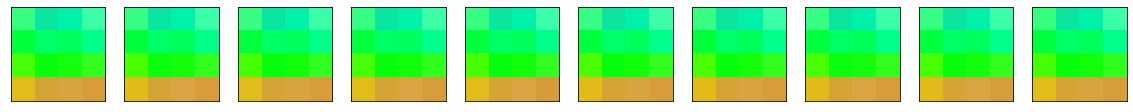

generated_images_8x8


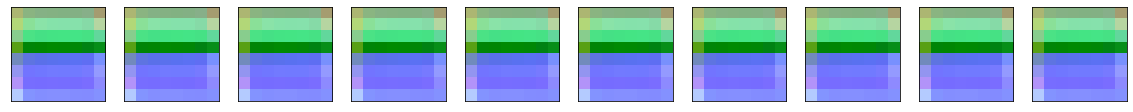

generated_images_16x16


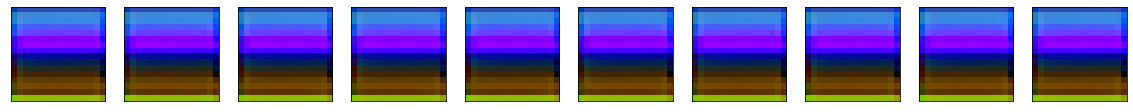

generated_images_32x32


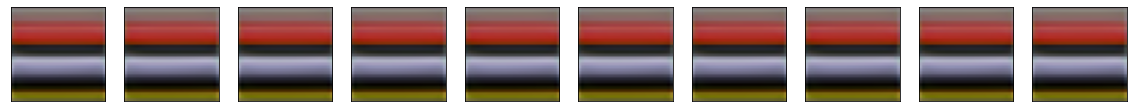

In [44]:
num_images = len(generated_images["generated_images_4x4"])

for k, v in sorted_generated_images:
    print(k)
    plt.figure(figsize=(20, 20))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(v[i], cmap=plt.cm.binary)
    plt.show()

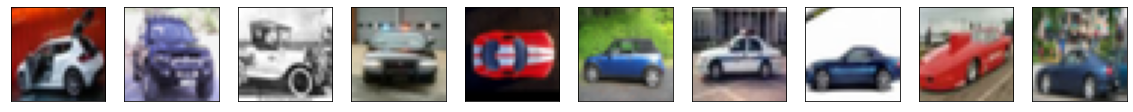

In [45]:
num_images = len(encoded_images["encoded_images_4x4"])

plt.figure(figsize=(20, 20))
for i in range(num_images):
    plt.subplot(1, num_images, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[y_test.flatten() == 1][i], cmap=plt.cm.binary)
plt.show()

encoded_images_4x4


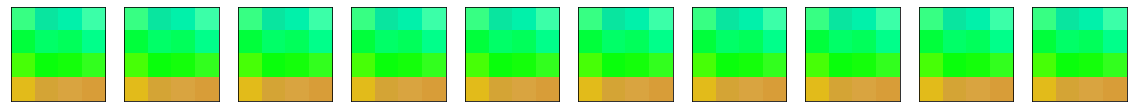

encoded_images_8x8


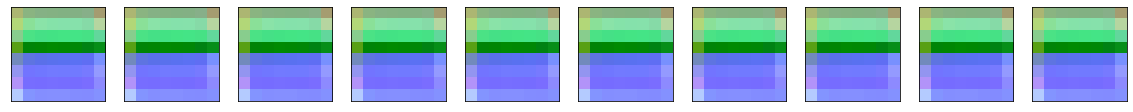

encoded_images_16x16


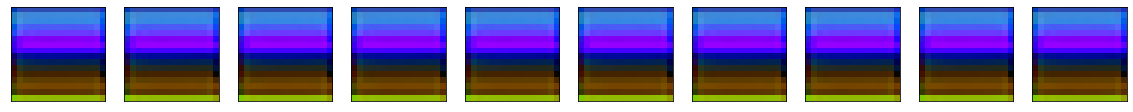

encoded_images_32x32


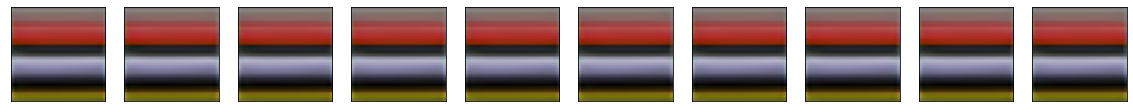

In [46]:
num_images = len(encoded_images["encoded_images_4x4"])

for k, v in sorted_encoded_images:
    print(k)
    plt.figure(figsize=(20, 20))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(v[i], cmap=plt.cm.binary)
    plt.show()

In [47]:
for k, v in sorted_anomaly_scores:
    print(k)
    print(v)

anomaly_scores_4x4
[-0.30484152 -0.30504307 -0.30491313 -0.3050587  -0.30477434 -0.3051348
 -0.30506343 -0.30478805 -0.30510065 -0.3051108 ]
anomaly_scores_8x8
[-0.3013708  -0.3025571  -0.30249724 -0.30238798 -0.30048707 -0.30284014
 -0.30274913 -0.30146796 -0.3023266  -0.30261278]
anomaly_scores_16x16
[-0.29788414 -0.29966408 -0.29752576 -0.30113065 -0.29770306 -0.3001265
 -0.29995412 -0.29478368 -0.30090508 -0.3012517 ]
anomaly_scores_32x32
[-0.28859955 -0.27989128 -0.27441105 -0.28992316 -0.28443766 -0.2903293
 -0.28730464 -0.25049204 -0.28756857 -0.29377893]


In [48]:
for k, v in sorted_anomaly_flags:
    print(k)
    print(v)

anomaly_flags_4x4
[0 0 0 0 0 0 0 0 0 0]
anomaly_flags_8x8
[0 0 0 0 0 0 0 0 0 0]
anomaly_flags_16x16
[0 0 0 0 0 0 0 0 0 0]
anomaly_flags_32x32
[0 0 0 0 0 0 0 0 0 0]


### Dirty

In [50]:
predict_fn = tf.contrib.predictor.from_saved_model(
    "gs://machine-learning-1234-bucket/gan/pg_anogan_sim_enc/trained_model_gcp_big/export/exporter/1592167619/"
)
predictions = predict_fn(
    {
        "query_image": x_test[0:10],
        "Z": np.random.normal(size=(10, 512))
    }
)

INFO:tensorflow:Restoring parameters from gs://machine-learning-1234-bucket/gan/pg_anogan_sim_enc/trained_model_gcp_big/export/exporter/1592167619/variables/variables


In [51]:
print(list(predictions.keys()))

['anomaly_flags_4x4', 'generated_images_32x32', 'anomaly_flags_16x16', 'encoded_images_4x4', 'generated_images_4x4', 'anomaly_scores_16x16', 'anomaly_flags_8x8', 'encoded_images_32x32', 'encoded_images_8x8', 'generated_images_8x8', 'generated_images_16x16', 'anomaly_scores_4x4', 'encoded_images_16x16', 'anomaly_flags_32x32', 'anomaly_scores_32x32', 'anomaly_scores_8x8']


In [52]:
encoded_images = {k: v for k, v in predictions.items() if k[0:14] == "encoded_images"}
list(encoded_images.keys())

['encoded_images_4x4',
 'encoded_images_32x32',
 'encoded_images_8x8',
 'encoded_images_16x16']

In [53]:
anomaly_scores = {k: v for k, v in predictions.items() if k[0:14] == "anomaly_scores"}
list(anomaly_scores.keys())

['anomaly_scores_16x16',
 'anomaly_scores_4x4',
 'anomaly_scores_32x32',
 'anomaly_scores_8x8']

In [54]:
anomaly_flags = {k: v for k, v in predictions.items() if k[0:13] == "anomaly_flags"}
list(anomaly_flags.keys())

['anomaly_flags_4x4',
 'anomaly_flags_16x16',
 'anomaly_flags_8x8',
 'anomaly_flags_32x32']

In [55]:
def sort_dict_by_image_size(input_dict):
    sorted_input_dict = [
        x[0:2]
        for x in sorted(
            [
                (
                    k,
                    input_dict[k],
                    int(k.split("x")[-1])
                )
                for k in input_dict.keys()
            ],
            key=lambda tup: tup[2]
        )
    ]

    for k, v in sorted_input_dict:
        print(k, v.shape)

    return sorted_input_dict

Convert image back to the original scale.

In [56]:
encoded_images = {
    k: np.clip(
        a=((v + 1.0) * (255. / 2)).astype(np.int32),
        a_min=0,
        a_max=255
    )
    for k, v in encoded_images.items()
}

sorted_encoded_images = sort_dict_by_image_size(encoded_images)

encoded_images_4x4 (10, 4, 4, 3)
encoded_images_8x8 (10, 8, 8, 3)
encoded_images_16x16 (10, 16, 16, 3)
encoded_images_32x32 (10, 32, 32, 3)


In [57]:
sorted_anomaly_scores = sort_dict_by_image_size(anomaly_scores)

anomaly_scores_4x4 (10,)
anomaly_scores_8x8 (10,)
anomaly_scores_16x16 (10,)
anomaly_scores_32x32 (10,)


In [58]:
sorted_anomaly_flags = sort_dict_by_image_size(anomaly_flags)

anomaly_flags_4x4 (10,)
anomaly_flags_8x8 (10,)
anomaly_flags_16x16 (10,)
anomaly_flags_32x32 (10,)


generated_images_4x4


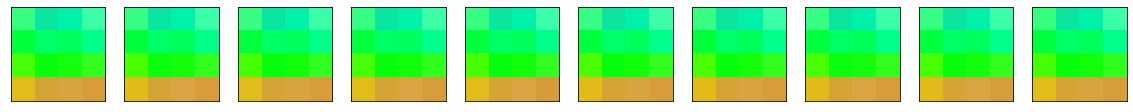

generated_images_8x8


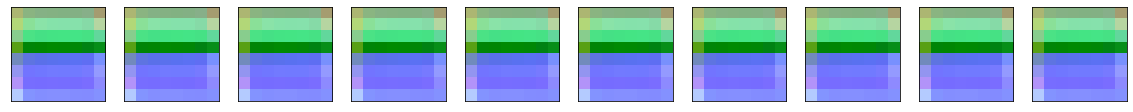

generated_images_16x16


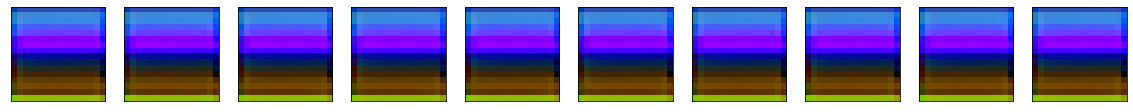

generated_images_32x32


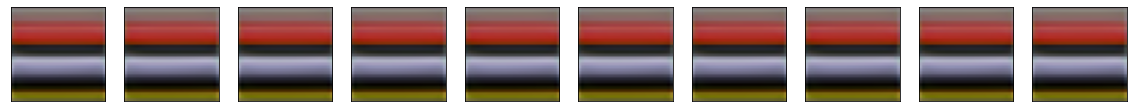

In [63]:
num_images = len(generated_images["generated_images_4x4"])

for k, v in sorted_generated_images:
    print(k)
    plt.figure(figsize=(20, 20))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(v[i], cmap=plt.cm.binary)
    plt.show()

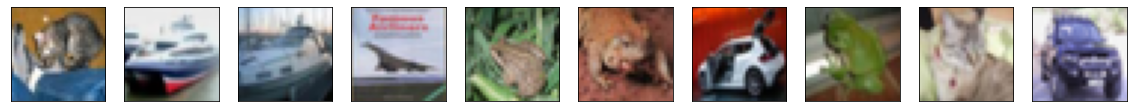

In [59]:
num_images = len(encoded_images["encoded_images_4x4"])

plt.figure(figsize=(20, 20))
for i in range(num_images):
    plt.subplot(1, num_images, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
plt.show()

encoded_images_4x4


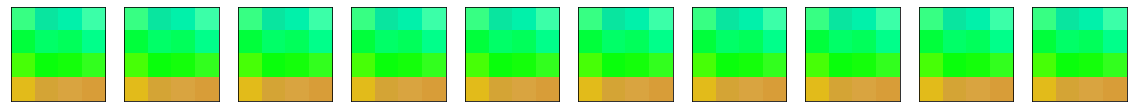

encoded_images_8x8


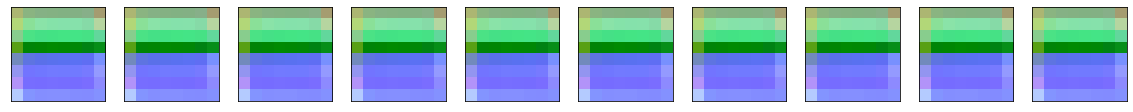

encoded_images_16x16


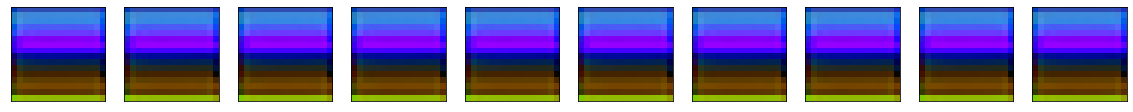

encoded_images_32x32


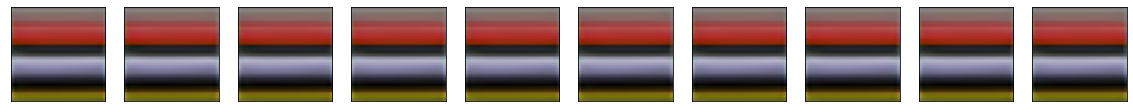

In [60]:
num_images = len(encoded_images["encoded_images_4x4"])

for k, v in sorted_encoded_images:
    print(k)
    plt.figure(figsize=(20, 20))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(v[i], cmap=plt.cm.binary)
    plt.show()

In [61]:
for k, v in sorted_anomaly_scores:
    print(k)
    print(v)

anomaly_scores_4x4
[-0.30509606 -0.30490312 -0.30510116 -0.30513215 -0.30522016 -0.3050729
 -0.30483514 -0.3051631  -0.30510718 -0.3050392 ]
anomaly_scores_8x8
[-0.30278537 -0.30197033 -0.30265868 -0.30251655 -0.3027761  -0.30222687
 -0.3013708  -0.30226126 -0.30287316 -0.3025571 ]
anomaly_scores_16x16
[-0.29993728 -0.2982958  -0.30021852 -0.29965487 -0.3008893  -0.3010743
 -0.29788414 -0.30069983 -0.298918   -0.29966405]
anomaly_scores_32x32
[-0.2901759  -0.27276796 -0.28631654 -0.28003478 -0.28991407 -0.29363883
 -0.28859955 -0.29376644 -0.27878314 -0.27989125]


In [62]:
for k, v in sorted_anomaly_flags:
    print(k)
    print(v)

anomaly_flags_4x4
[0 0 0 0 0 0 0 0 0 0]
anomaly_flags_8x8
[0 0 0 0 0 0 0 0 0 0]
anomaly_flags_16x16
[0 0 0 0 0 0 0 0 0 0]
anomaly_flags_32x32
[0 0 0 0 0 0 0 0 0 0]
